In [6]:
import pandas as pd
import re
from textblob import TextBlob


# Load the CSV file to inspect the data
file_path = r'C:\Users\FATEMEH\Desktop\DA\Tweet Analysis\Borderlands\Tweets.csv'
tweets_df = pd.read_csv(file_path)

# Show the first few rows to understand the structure of the data
tweets_df.head()


,"im getting on borderlands and i will murder you all ,"
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...


In [7]:
import re
from textblob import TextBlob

# Clean the tweets: remove mentions, special characters, and convert to lowercase
def clean_tweet(tweet):
    # Remove mentions (@username) and special characters
    tweet = re.sub(r'@[\w]+', '', tweet)  # remove mentions
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)  # remove special characters
    tweet = tweet.lower().strip()  # convert to lowercase and remove extra spaces
    return tweet

# Apply the cleaning function to the tweets
tweets_df['cleaned_tweet'] = tweets_df.iloc[:, 0].apply(clean_tweet)

# Drop duplicates and null values
tweets_df_cleaned = tweets_df.drop_duplicates(subset='cleaned_tweet').dropna(subset=['cleaned_tweet'])

# Display cleaned data
tweets_df_cleaned.head()


,"im getting on borderlands and i will murder you all ,",cleaned_tweet
0,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
4,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [8]:
# Perform sentiment analysis using TextBlob
def get_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    return 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

# Apply sentiment analysis to the cleaned tweets
tweets_df_cleaned['sentiment'] = tweets_df_cleaned['cleaned_tweet'].apply(get_sentiment)


# Display the cleaned DataFrame with sentiment labels
print(tweets_df_cleaned.head())

# Alternatively, if you want to save it as a CSV file
tweets_df_cleaned.to_csv('cleaned_tweets_with_sentiment.csv', index=False)



  im getting on borderlands and i will murder you all ,  \
0  I am coming to the borders and I will kill you...      
1  im getting on borderlands and i will kill you ...      
2  im coming on borderlands and i will murder you...      
3  im getting on borderlands 2 and i will murder ...      
4  im getting into borderlands and i can murder y...      

                                       cleaned_tweet sentiment  
0  i am coming to the borders and i will kill you...   neutral  
1  im getting on borderlands and i will kill you all   neutral  
2  im coming on borderlands and i will murder you...   neutral  
3  im getting on borderlands  and i will murder y...   neutral  
4  im getting into borderlands and i can murder y...   neutral  


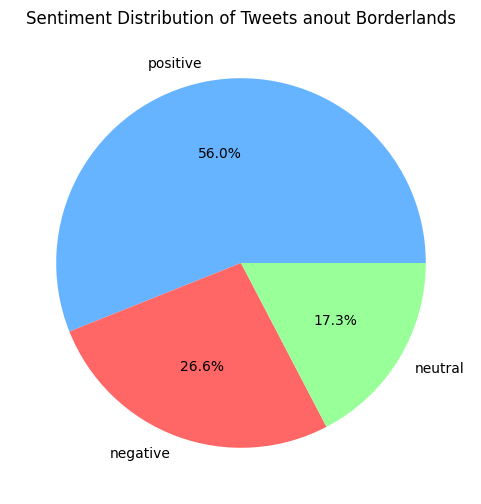

In [9]:
import matplotlib.pyplot as plt

# Count the number of positive and negative tweets
sentiment_counts = tweets_df_cleaned['sentiment'].value_counts()

# Plot a pie chart to visualize the percentage of positive, negative, and neutral tweets
plt.figure(figsize=(6, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff6666', '#99ff99'])
plt.title('Sentiment Distribution of Tweets anout Borderlands')
plt.ylabel('')
plt.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


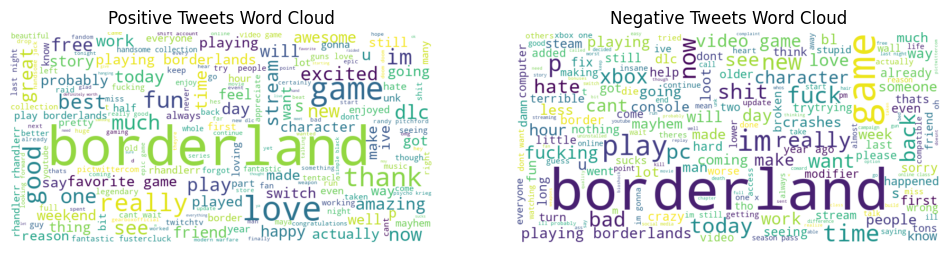

In [10]:
%pip install wordcloud

from wordcloud import WordCloud

# Separate the positive and negative tweets
positive_tweets = tweets_df_cleaned[tweets_df_cleaned['sentiment'] == 'positive']['cleaned_tweet']
negative_tweets = tweets_df_cleaned[tweets_df_cleaned['sentiment'] == 'negative']['cleaned_tweet']

# Combine all the positive and negative tweets into single strings
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

# Plot positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Tweets Word Cloud")
plt.axis('off')

# Plot negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Tweets Word Cloud")
plt.axis('off')

plt.show()

